<a href="https://colab.research.google.com/github/quinbez/Converting-User-Text-into-Prompt-for-Image-Generation/blob/main/Converting_User's_Text_into_Prompt_for_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To convert user text into a prompt for image generation, we need to extract key details and summarize the text effectively. Below are the steps to do that:

- Identify and extract key elements from the text such as main subjects (who), actions (what), settings (where), and descriptive details.
- Summarize the extracted information into a concise description that captures the essence of the text.
- Format the summarized content into a coherent and detailed prompt suitable for an image generation model.

In [ ]:
!pip install --upgrade diffusers transformers scipy accelerate safetensors sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install spacy -q

In [ ]:
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import torch
from diffusers import PixArtSigmaPipeline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weight_dtype = torch.float16

pipe = PixArtSigmaPipeline.from_pretrained(
    "PixArt-alpha/PixArt-Sigma-XL-2-1024-MS",
    torch_dtype=weight_dtype,
    use_safetensors=True,
)
pipe.to(device)

nlp = spacy.load('en_core_web_sm')

def extract_key_information(text):
    doc = nlp(text)

    subjects = []
    actions = []
    settings = []
    descriptions = []

    for entity in doc.ents:
        if entity.label_ in ["PERSON", "ORG", "GPE", "LOC"]:
            subjects.append(entity.text)
        elif entity.label_ in ["EVENT", "PRODUCT", "WORK_OF_ART"]:
            descriptions.append(entity.text)

    for token in doc:
        if token.pos_ in ["VERB"]:
            actions.append(token.lemma_)
        elif token.pos_ in ["ADJ", "ADV"]:
            descriptions.append(token.text)

    return subjects, actions, settings, descriptions

def summarize_information(subjects, actions, settings, descriptions):
    prompt = "Create an image of "
    if subjects:
        prompt += ", ".join(subjects) + ", "
    if settings:
        prompt += "set in " + ", ".join(settings) + ", "
    if actions:
        prompt += "with people " + ", ".join(actions) + ", "
    if descriptions:
        prompt += "and details like " + ", ".join(descriptions) + "."

    prompt = prompt.replace(", .", ".")
    prompt = prompt.strip(", ")
    return prompt

def convert_text_to_prompt(text):
    subjects, actions, settings, descriptions = extract_key_information(text)
    prompt = summarize_information(subjects, actions, settings, descriptions)
    return prompt

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


Generated Prompt: Create an image of with people tower, cast, hang, reflect, dress, glide, sway, captivate, stand, gaze, admire, wear, shimmer, dress, flicker, cast, and details like breathtaking, grand, ornate, enchanting, starry, grand, overhead, polished, Elegantly, formal, live, quiet, young, large, arched, below, emerald, impeccably, gray, Soft, warm, romantic, magnificent.



Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 520.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 2.01 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 770.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with

Create an image of with people tower, cast, hang, reflect, dress, glide, sway, captivate, stand, gaze, admire, wear, shimmer, dress, flicker, cast, and details like breathtaking, grand, ornate, enchanting, starry, grand, overhead, polished, Elegantly, formal, live, quiet, young, large, arched, below, emerald, impeccably, gray, Soft, warm, romantic, magnificent.


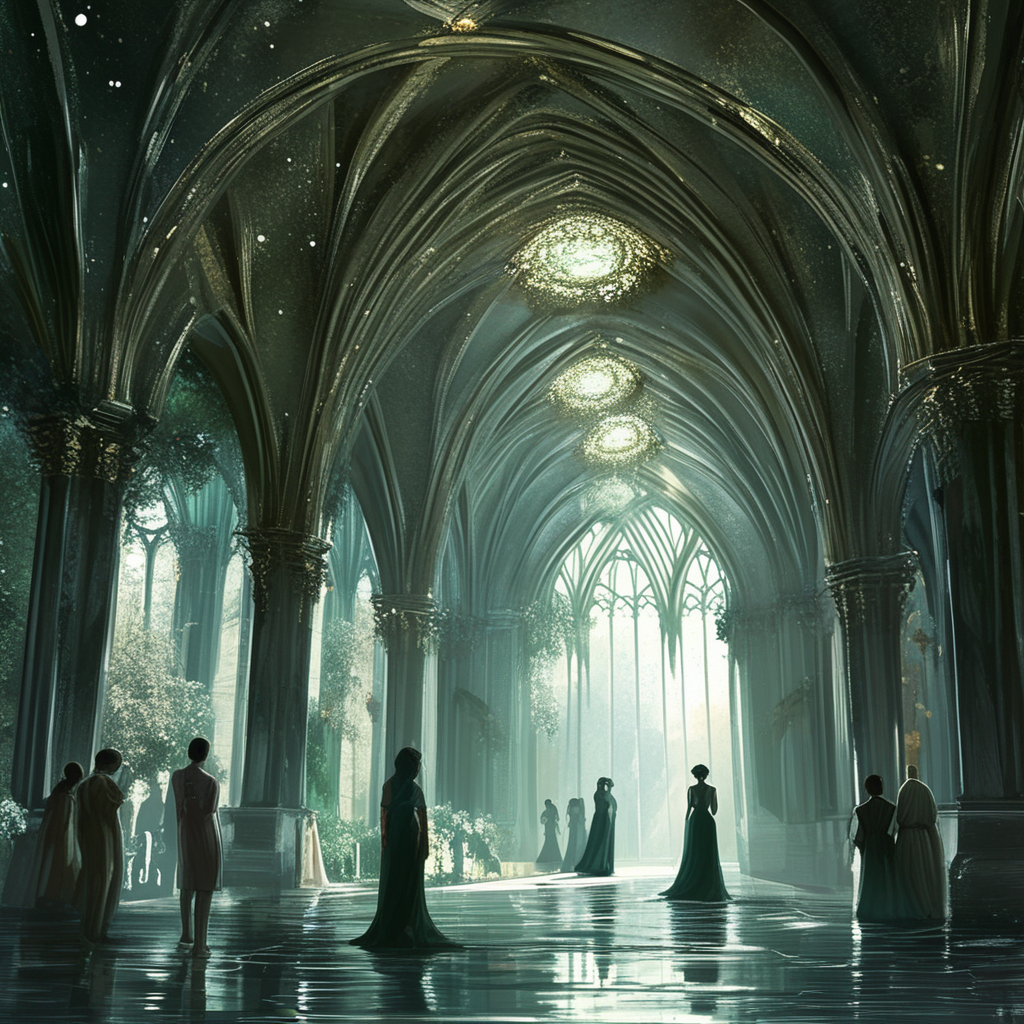

In [ ]:
user_text = """
It was a breathtaking evening at the grand castle. The towering spires and ornate architecture cast an enchanting silhouette against the starry night sky. Inside the grand ballroom, crystal chandeliers hung overhead, their light reflecting off the polished marble floors. Elegantly dressed guests glided across the dance floor, their formal gowns and tuxedos swaying in time with the live orchestra's captivating waltz. In a quiet corner, a young couple stood gazing out a large arched window, admiring the twinkling cityscape below. The woman wore a shimmering emerald dress, while the man was impeccably dressed in a charcoal gray suit. Soft candlelight flickered, casting a warm, romantic glow throughout the magnificent space.
"""

prompt = convert_text_to_prompt(user_text)
print(f"Generated Prompt: {prompt}")

image = pipe(prompt).images[0]

image.save("./generated_image.png")
print(prompt)
image


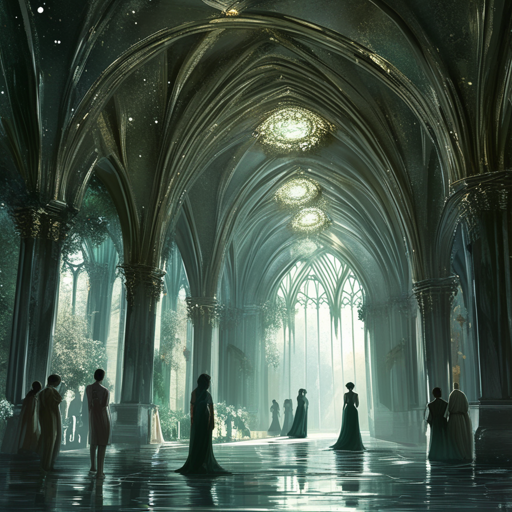

In [ ]:
from PIL import Image
image = Image.open("./generated_image.png")
new_size = (512, 512)
resized_image = image.resize(new_size)
resized_image.save("resized_generated_image.png")
resized_image